In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#load subset of Data

x_train=x_train[:1000]
y_train=y_train[:1000]

x_test=x_test[:100]
y_test=y_test[:100]


In [6]:
#Resize dimension
x_train=tf.image.resize(x_train[...,tf.newaxis],(224,224))
x_test=tf.image.resize(x_test[...,tf.newaxis],(224,224))

#convert to RGB
x_train=tf.image.grayscale_to_rgb(x_train)
x_test=tf.image.grayscale_to_rgb(x_test)


#normalise pixel value
x_train = x_train/255.0
x_test = x_test/255.0

#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [7]:
#Load VGG19 Pretrained
vgg19_model=VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [8]:
for layer in vgg19_model.layers:
    layer.trainable=False

model_fixed=models.Sequential([
    vgg19_model,
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

In [9]:
model_fixed.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history_fixed=model_fixed.fit(
    x_train,y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.2
)   

Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.1966 - loss: 6.8783 - val_accuracy: 0.6400 - val_loss: 0.9449
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.6838 - loss: 0.9861 - val_accuracy: 0.9400 - val_loss: 0.3302
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.9134 - loss: 0.3794 - val_accuracy: 0.9350 - val_loss: 0.2589
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.9215 - loss: 0.2859 - val_accuracy: 0.9500 - val_loss: 0.2086
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.9693 - loss: 0.1904 - val_accuracy: 0.9550 - val_loss: 0.1917
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.9420 - loss: 0.2098 - val_accuracy: 0.9600 - val_loss: 0.1737
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.9649 - loss: 0.1668 - val_accuracy: 0.9500 - val_loss: 0.1740
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.9816 - loss: 0.1084 - val_accuracy: 0.9550 - val_loss: 0.1660


In [11]:
for layer in vgg19_model.layers[-4:]:
    layer.trainable=True

model_fine_tuned=models.Sequential([
    vgg19_model,
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])
model_fine_tuned.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_fine_tuned=model_fine_tuned.fit(
    x_train,y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.2
) 

Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.1093 - loss: 3.1975 - val_accuracy: 0.0900 - val_loss: 2.3025
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.1027 - loss: 2.8001 - val_accuracy: 0.1100 - val_loss: 2.3168
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.1147 - loss: 2.3045 - val_accuracy: 0.0700 - val_loss: 2.3080
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.1051 - loss: 2.3805 - val_accuracy: 0.0900 - val_loss: 2.3008
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.1381 - loss: 2.2999 - val_accuracy: 0.0900 - val_loss: 2.3008
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.1163 - loss: 2.3009 - val_accuracy: 0.0900 - val_loss: 2.3009
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.1183 - loss: 2.2996 - val_accuracy: 0.0900 - val_loss: 2.3013
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.1283 - loss: 2.2980 - val_accuracy: 0.0900 - val_loss: 2.3015


In [14]:
#evaluate
test_loss_fixed , test_acc_fixed = model_fixed.evaluate(x_test,y_test)
test_loss_fine , test_acc_fine = model_fine_tuned.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0832 - loss: 2.3025
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1456 - loss: 2.2899


In [15]:
print("ACC for fixed",test_acc_fixed)
print("ACC for fine_tuned",test_acc_fine)



ACC for fixed 0.07000000029802322
ACC for fine_tuned 0.14000000059604645


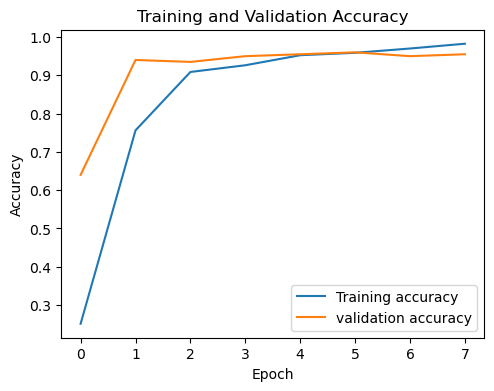

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fixed.history['accuracy'],label='Training accuracy')
plt.plot(history_fixed.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

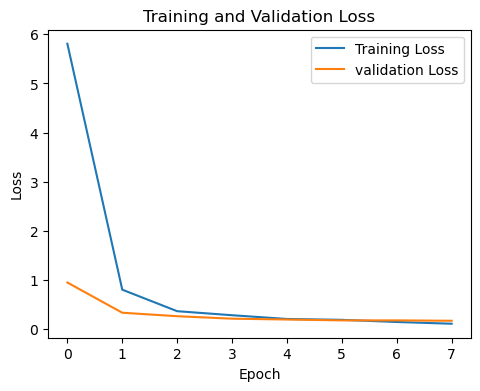

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fixed.history['loss'],label='Training Loss')
plt.plot(history_fixed.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

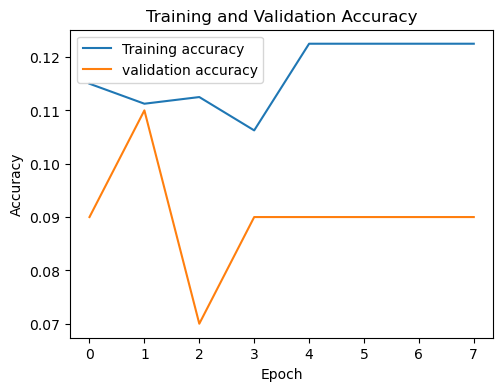

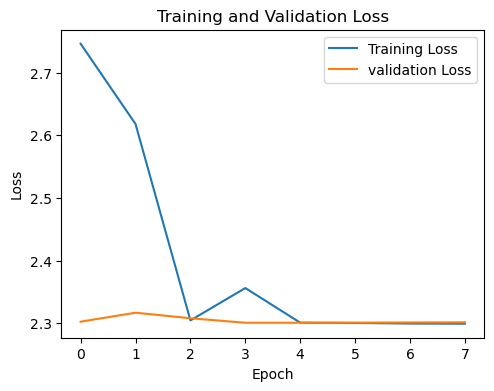

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fine_tuned.history['accuracy'],label='Training accuracy')
plt.plot(history_fine_tuned.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fine_tuned.history['loss'],label='Training Loss')
plt.plot(history_fine_tuned.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()